## Projeto Predição de Insuficiência Cardiaca

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Informações de atributo
- Idade: idade do paciente [anos]
- Sexo: sexo do paciente [M: Masculino, F: Feminino]
- ChestPainType: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- PA de repouso: pressão arterial de repouso [mm Hg]
- Colesterol: colesterol sérico [mm/dl]
- FastingBS: glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- ECG de repouso: resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- MaxHR: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- ExercícioAngina: angina induzida por exercício [S: Sim, N: Não]
- Pico antigo: pico antigo = ST [Valor numérico medido em depressão]
- ST_Slope: a inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: classe de saída [1: doença cardíaca, 0: normal]

# Extração

In [82]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

heart_df = pd.read_csv('./dataset/heart.csv', sep=',')
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [83]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequência Cardiaca Max', 
    'ExerciseAngina': 'Exercicio_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doenca_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequência Cardiaca Max,Exercicio_Angina,Pico_Antigo,ST_Slope,Doenca_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploração

In [84]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Colunas: 12
Linhas: 918


In [85]:
heart_df.describe()

,Idade,RepousoPA,Colesterol,FastingBS,Frequência Cardiaca Max,Pico_Antigo,Doenca_Cardiaca
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [86]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    918 non-null    int64  
 1   Sexo                     918 non-null    object 
 2   Tipo_Dor_Peito           918 non-null    object 
 3   RepousoPA                918 non-null    int64  
 4   Colesterol               918 non-null    int64  
 5   FastingBS                918 non-null    int64  
 6   RestingECG               918 non-null    object 
 7   Frequência Cardiaca Max  918 non-null    int64  
 8   Exercicio_Angina         918 non-null    object 
 9   Pico_Antigo              918 non-null    float64
 10  ST_Slope                 918 non-null    object 
 11  Doenca_Cardiaca          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Calculando a quantidade de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

In [87]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doenca_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doenca_Cardiaca == 0').shape[0])

paciente com Insuficiência Cardiacas: 508
paciente sem Insuficiência Cardiaca: 410


# Limpeza

Percebemos que não ha valores NaN em nosso DataSet. Como existem valores erroneos, podemos passar para o proximo passo da AED.

In [88]:
print(heart_df.notna().value_counts())

Idade  Sexo  Tipo_Dor_Peito  RepousoPA  Colesterol  FastingBS  RestingECG  Frequência Cardiaca Max  Exercicio_Angina  Pico_Antigo  ST_Slope  Doenca_Cardiaca
True   True  True            True       True        True       True        True                     True              True         True      True               918
dtype: int64


# Discretização

Formar conjuntos de idade para classificação

In [89]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

Idade máxima:  77
Idade MINIMA:  28


In [90]:
# bins = [0,12,20,60,100]
# conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins)

In [91]:
# heart_df['conjunto_idade'] = conjuto_idade

In [92]:
# heart_df['conjunto_idade'].value_counts()

In [93]:
heart_df

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequência Cardiaca Max,Exercicio_Angina,Pico_Antigo,ST_Slope,Doenca_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Quais atributos tem relação?

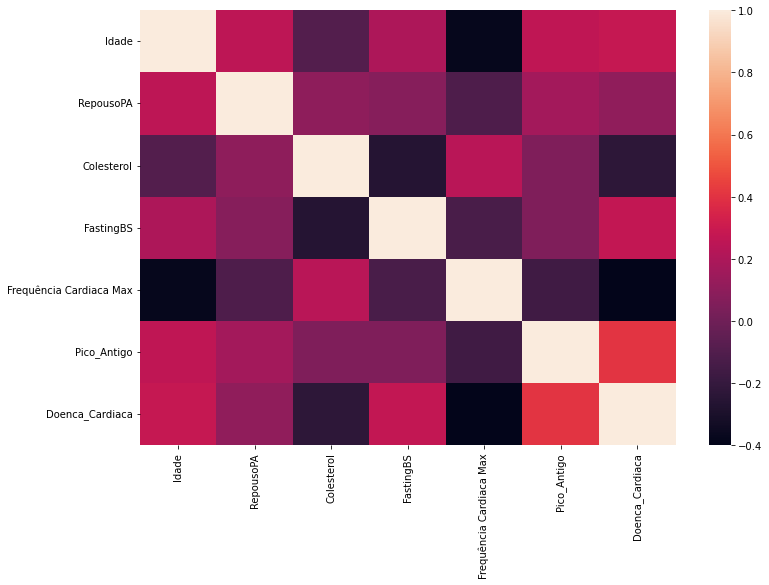

In [94]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(heart_df.corr())
plt.show()

Para plotar várias distribuições bivariadas de pares em um conjunto de dados, você pode usar a função pairplot(). Isso mostra a relação para (n, 2) combinação de variáveis em um DataFrame como uma matriz de gráficos e os gráficos diagonais são os gráficos univariados.

In [95]:
# plt.figure(figsize=(15,10))
# sns.pairplot(heart_df,hue="Doenca_Cardiaca")
# plt.title("Looking for Insites in Data")
# plt.legend("HeartDisease")
# plt.tight_layout()
# plt.plot()

Agora, para verificar a linearidade das variáveis, é uma boa prática traçar o gráfico de distribuição e procurar a assimetria dos recursos. A estimativa de densidade do kernel (kde) é uma ferramenta bastante útil para traçar a forma de uma distribuição.

In [96]:
# plt.figure(figsize=(15,10))
# for i,col in enumerate(heart_df.columns,1):
#     plt.subplot(4,3,i)
#     plt.title(f"Distribution of {col} Data")
#     sns.histplot(heart_df[col],kde=True)
#     plt.tight_layout()
#     plt.plot()

# Desision Tree Train

- Apontamento de classe alvo 'y'

In [97]:
y = heart_df['Doenca_Cardiaca'].values
heart_df.drop(columns=['Doenca_Cardiaca'], inplace=True)

In [98]:
X = heart_df

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

- Criação do algoritmos de Arvore de Decisão.

É passado como critério que será utilizado o calculo de **ENTROPIA** para categorização dos dados

In [100]:
for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [101]:
tree_view = DecisionTreeClassifier(random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view.fit(X_train, y_train)
predicao = model.predict(X_train)

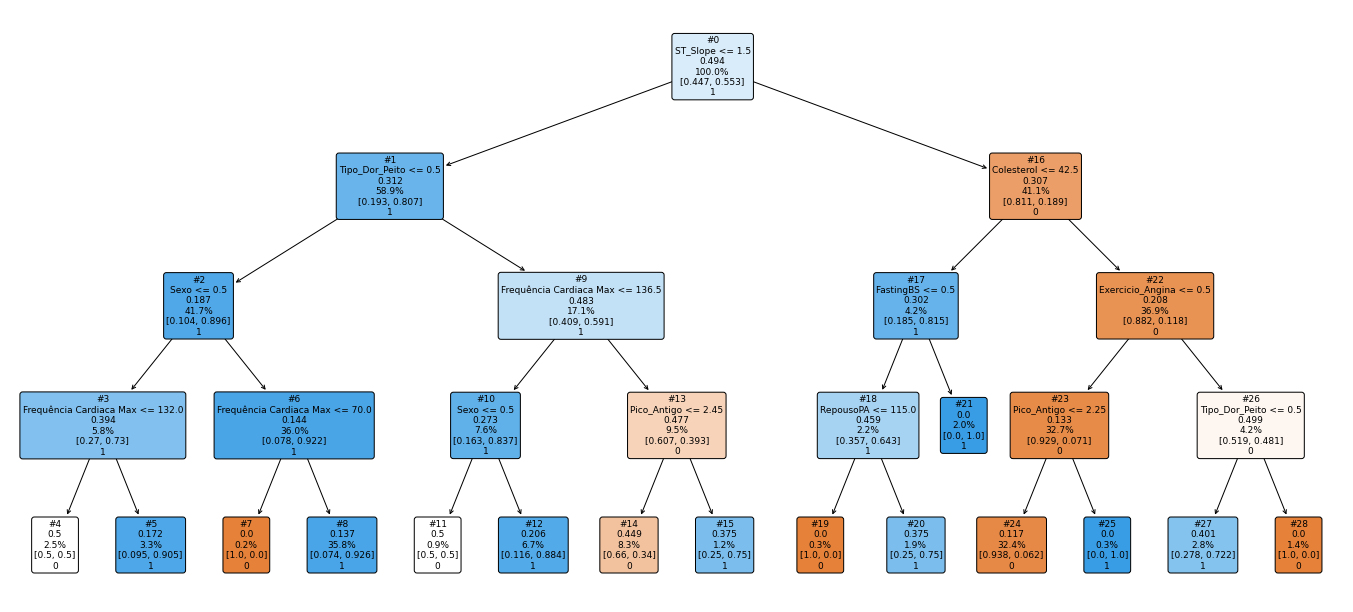

In [102]:
nome_features = X_train.columns

plt.figure(figsize=(24,11))

plt.title('treino')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [103]:
y_accuracy = accuracy_score(y_train, predicao)
print('Valor Acuracia: ',y_accuracy)
print(classification_report(y_train, predicao))

Valor Acuracia:  0.881619937694704
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       287
           1       0.90      0.88      0.89       355

    accuracy                           0.88       642
   macro avg       0.88      0.88      0.88       642
weighted avg       0.88      0.88      0.88       642



# Decision Tree Test

In [104]:
for c in X_test.columns:
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes

In [105]:
tree_view = DecisionTreeClassifier(random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view.fit(X_train, y_train)
predicao = model.predict(X_train)

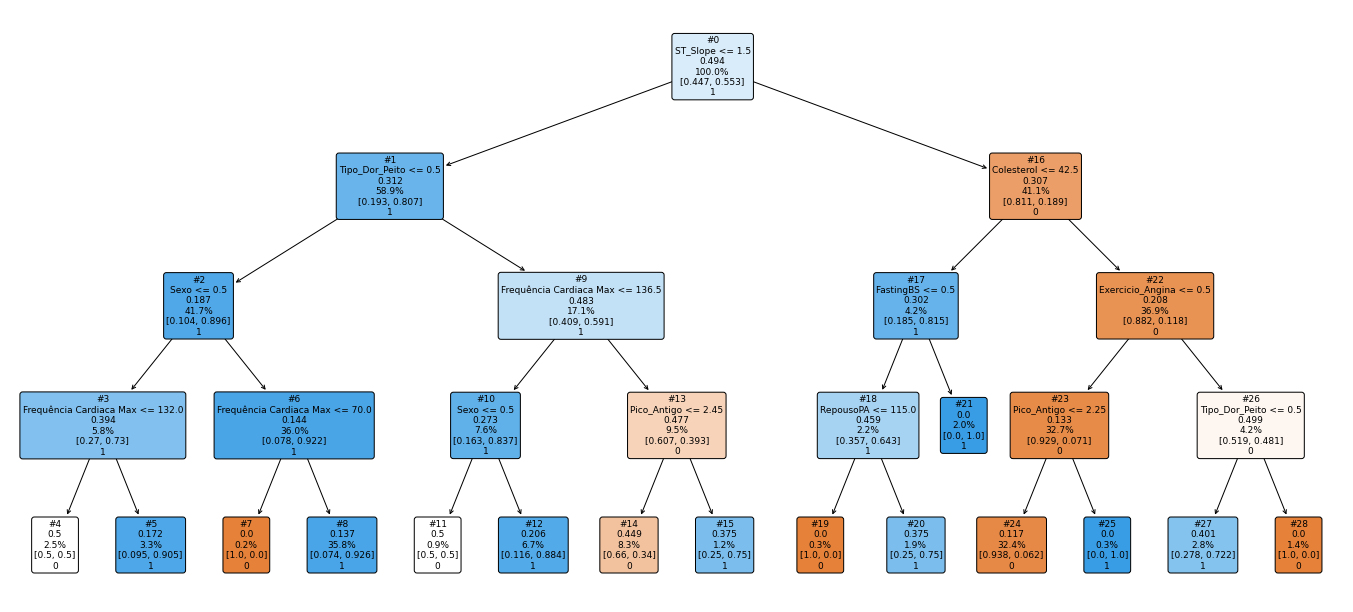

In [106]:
nome_features = X_test.columns

plt.figure(figsize=(24,11))

plt.title('teste')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [107]:
y_accuracy = accuracy_score(y_train, predicao)
print('Valor Acuracia: ',y_accuracy)
print(classification_report(y_train, predicao))

Valor Acuracia:  0.881619937694704
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       287
           1       0.90      0.88      0.89       355

    accuracy                           0.88       642
   macro avg       0.88      0.88      0.88       642
weighted avg       0.88      0.88      0.88       642



# Logistic Regression Train

In [108]:
lr = LogisticRegression(max_iter = 1000 ,random_state = 0)

In [109]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [110]:
y_preds = lr.predict(X_train)

In [111]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.8520249221183801
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       287
           1       0.86      0.88      0.87       355

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



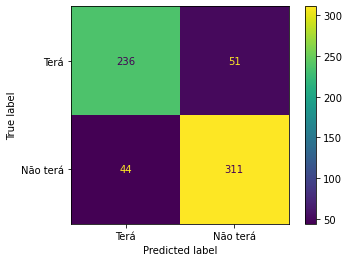

In [112]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# GaussianNB Train

In [113]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_train)

In [114]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.8629283489096573
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       287
           1       0.88      0.87      0.88       355

    accuracy                           0.86       642
   macro avg       0.86      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642



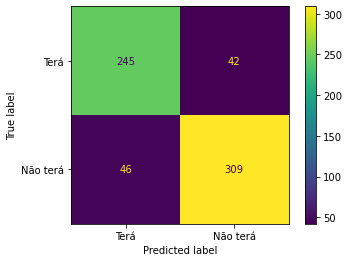

In [115]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()